In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error
warnings.filterwarnings('ignore')

### Loading The Data

In [2]:
data = pd.read_csv('train.csv',index_col='Id')
data.head()

,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
Id,,,,,,,,
1,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-23,ConfirmedCases,0
2,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-23,Fatalities,0
3,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-24,ConfirmedCases,0
4,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-24,Fatalities,0
5,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-25,ConfirmedCases,0


In [3]:
data.dtypes

County             object
Province_State     object
Country_Region     object
Population          int64
Weight            float64
Date               object
Target             object
TargetValue         int64
dtype: object

### Explanation Of Data

<b> The data has Eight columns <br>

<ol>
    <li> County : This Feature is like a district in country </li>
    <li> Province_State : This feature Is like a State In country </li>
    <li> Country_regioh : This is the Country Name </li>
    <li> population : Count of the Population </li>
    <li> Weight  ** </li>
    <li> Date </li>
    <li> Target : It has two variables Confirmedcases Fatalities </li>
    <li> TargetValue : It tells the count of the Above Target Value </li>
</ol>

In [104]:
data.isnull().sum()

County            89600
Province_State    52360
Country_Region        0
Population            0
Weight                0
Date                  0
Target                0
TargetValue           0
dtype: int64

In [105]:
data.nunique()

County            1840
Province_State     133
Country_Region     187
Population        3408
Weight            6816
Date               140
Target               2
TargetValue       2603
dtype: int64

In [16]:
data['Country_Region'].nunique(), data['County'].nunique(),data['Province_State'].nunique()

(187, 1840, 133)

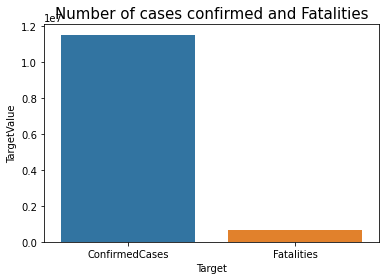

In [5]:
sns.barplot(y=data[['Target','TargetValue']].groupby('Target').sum().reset_index()['TargetValue'],
            x=data[['Target','TargetValue']].groupby('Target').sum().reset_index()['Target'])
plt.title('Number of cases confirmed and Fatalities',fontsize=15)
plt.show()

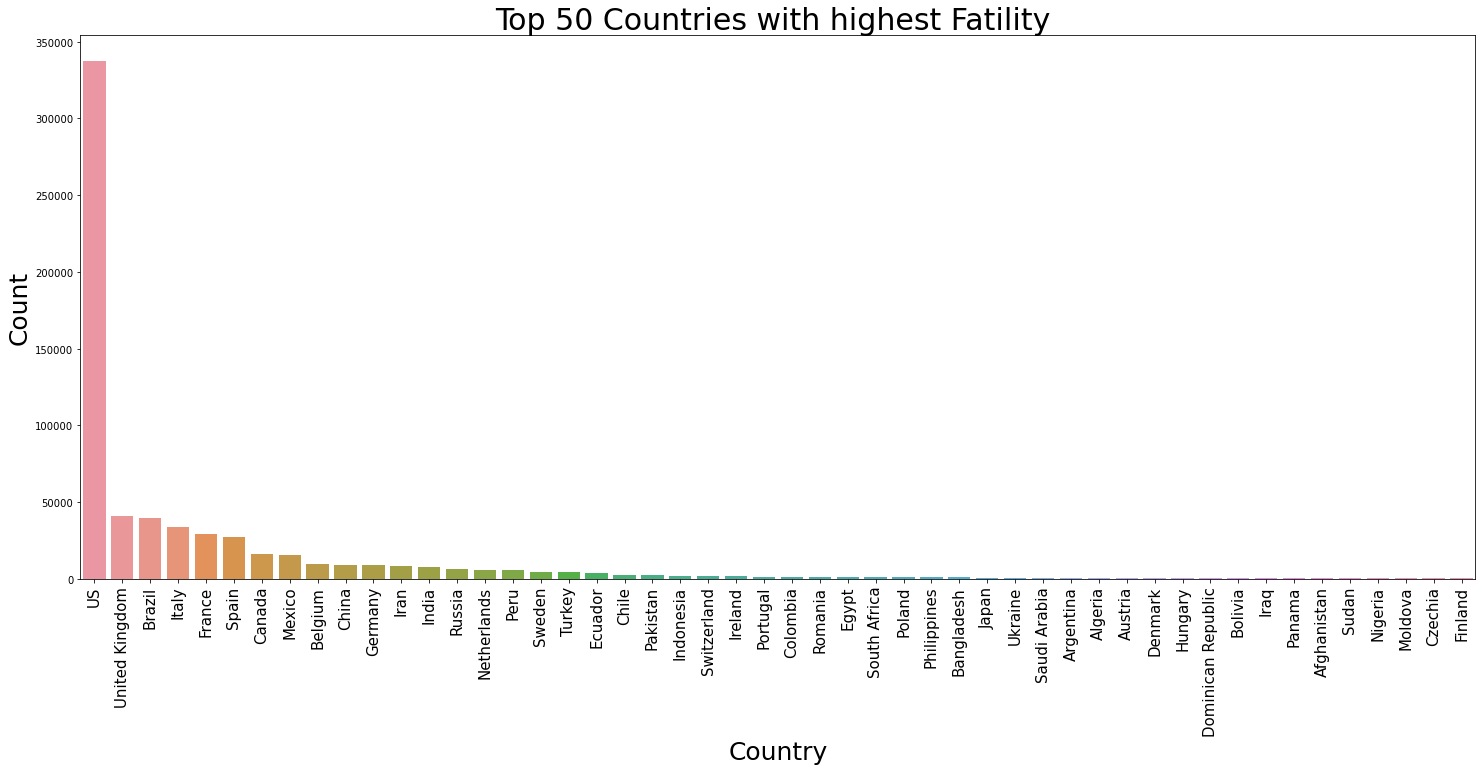

In [7]:
country_ = data[['Country_Region','Target','TargetValue']].groupby(['Country_Region','Target']).sum()
country_ = country_.reset_index()
fatility_ = country_[country_['Target']=='Fatalities'].sort_values(by='TargetValue',ascending=False)
Confirmed_= country_[country_['Target']=='ConfirmedCases'].sort_values(by='TargetValue',ascending=False)

plt.figure(figsize=(25,10))
sns.barplot(y=fatility_['TargetValue'][:50],x=fatility_['Country_Region'][:50])
plt.xticks(rotation='vertical',fontsize=15)
plt.ylabel('Count',fontsize=25)
plt.xlabel('Country',fontsize=25)
plt.title('Top 50 Countries with highest Fatility ',fontsize=30)
plt.show()

<h> As From the above we can see that the death count on y_axis and country on x_axis <br> 
<h> The Top 3 country's having Death Frequency is <h>
<ol>
    <li>US </li>
    <li>United KIngdom </li>
    <li>Brazil </li>
    <li>Italy </li>
    <li>France</li>
</ol>

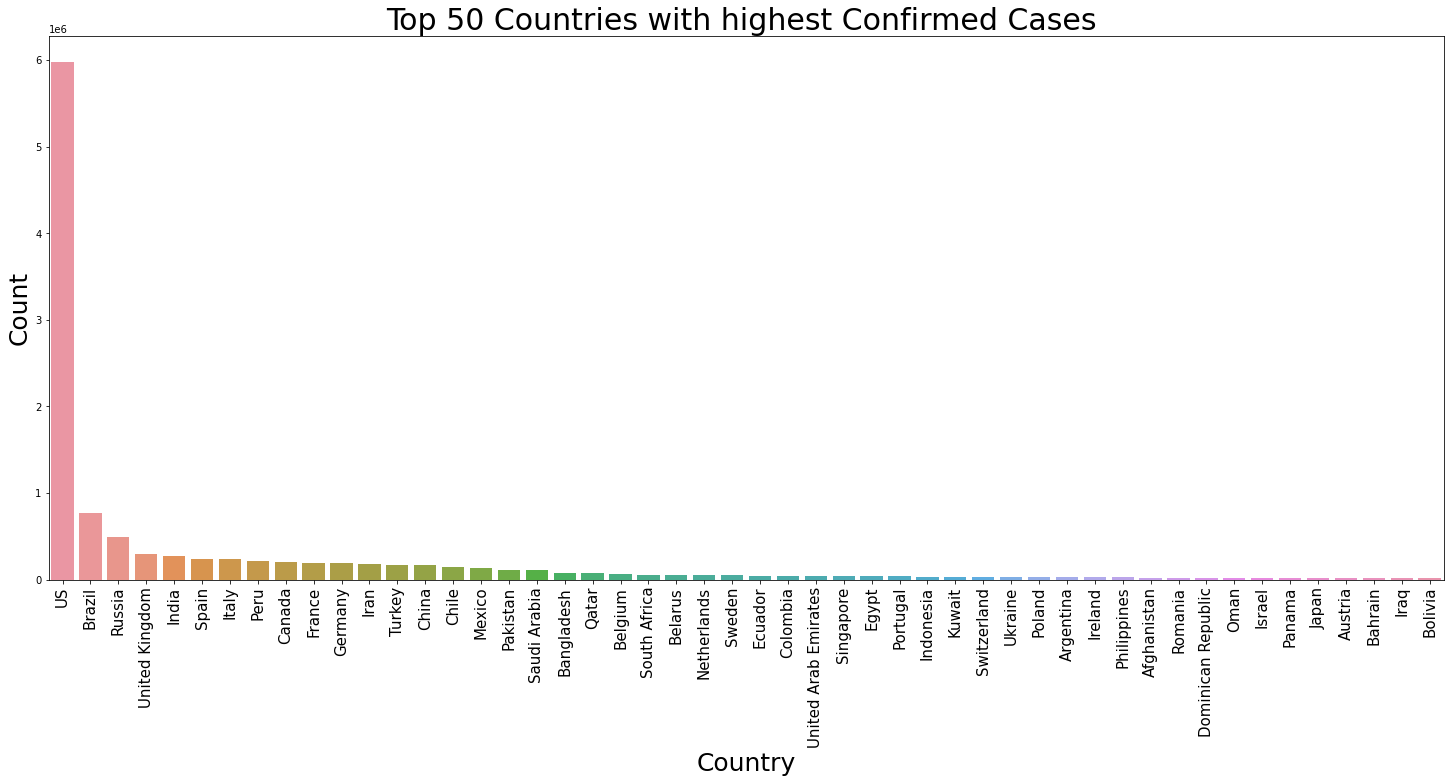

In [8]:
plt.figure(figsize=(25,10))
sns.barplot(y=Confirmed_['TargetValue'][:50],x=Confirmed_['Country_Region'][:50])
plt.xticks(rotation='vertical',fontsize=15)
plt.ylabel('Count',fontsize=25)
plt.xlabel('Country',fontsize=25)
plt.title('Top 50 Countries with highest Confirmed Cases ',fontsize=30)
plt.show()

<h> As From the above we can see that the Confirmed cases count on y_axis and country on x_axis  <h> <br>
 <h> The top 3 countries of having Confirmed cases <h>
<ol>
    <li>US </li>
    <li>Brazil </li>
    <li>Russia </li>
    <li>United Kingdom </li>
    <li>India </li>
</ol>

<b> We have The data of 187 Country Regions

In [9]:
def per_country_region_plot(data,country_region):
    '''Input : Takes the data and country_region Name
        Here You can give any country name with in the data set
       function => it plots the percentage of People with ConfirmedCases and Fatalites'''
    ### taking that particular country details
    data = data[data['Country_Region']==country_region]
    labels = ['ConfirmedCases','Fatalites']
    ## doing simple groupby func for getting count
    data =  data[['Target','TargetValue']].groupby('Target')['TargetValue'].sum()
    plt.title('Plot for total Percentage of confirmed cases and Fatalites in {}'.format(country_region),fontsize=20)
    plt.pie(data.values,labels = labels, autopct="%.2f%%",shadow=True,explode = (0,0.30),pctdistance=0.25,startangle=180)
    plt.show()

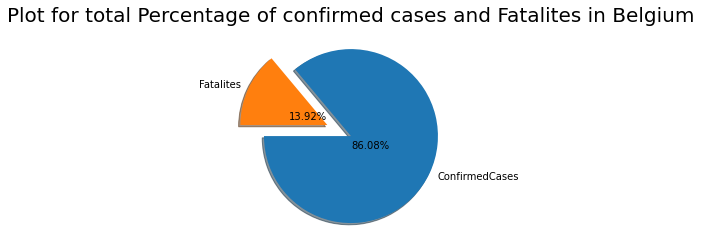

In [10]:
## Here you can change the Country and for need if you want to for different company
per_country_region_plot(data,'Belgium')

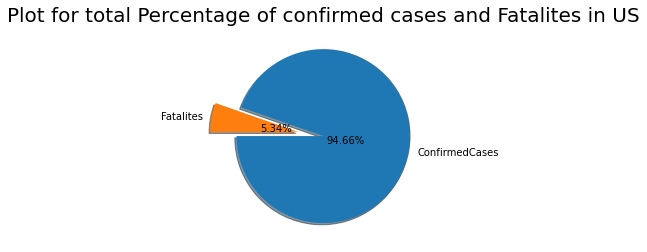

In [11]:
per_country_region_plot(data,'US')

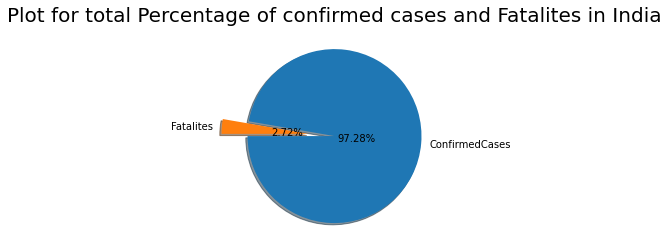

In [12]:
per_country_region_plot(data,'India')

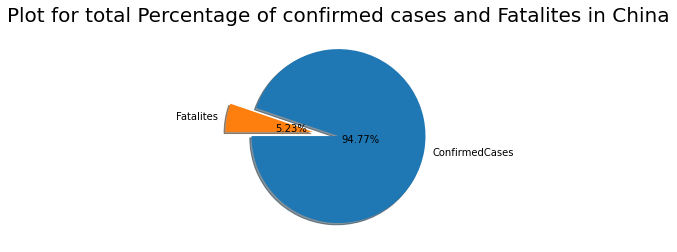

In [13]:
per_country_region_plot(data,'China')

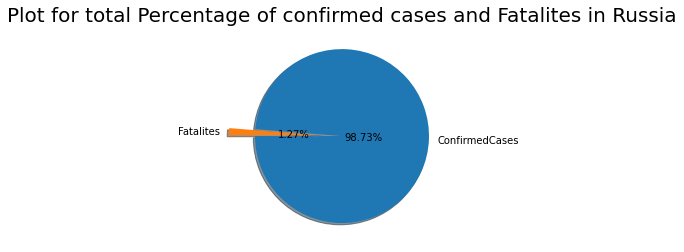

In [14]:
per_country_region_plot(data,'Russia')

In [15]:
def country_size_Affected(data,country):
    '''Input : It takes the Data and a particular country
       Function & Output : It plots the histogram of percentage of people not Affetected and confirmed and Fatilities'''
    
    data = data[data['Country_Region']==country]
    ### This is a boundary for columns having Nan values
    if data['Population'].nunique()==1:
        population = data['Population'].unique()[0]
    else:
        population = sum(data['Population'])
    data = data[['Target','TargetValue']].groupby('Target')['TargetValue'].sum()
    Not_Affected_people = population- (data['ConfirmedCases']+data['Fatalities'])
    NOt_percentage = (Not_Affected_people/population)*100
    conf_percentage = (data['ConfirmedCases']/population)*100
    fati_percentage = (data['Fatalities']/population)*100
    print('The Percentage of People NOt affected {}'.format(NOt_percentage))
    print('The percentage of people with Confirmed cases {}'.format(conf_percentage))
    print('The Percentage of people with Fatility Cases {}'.format(fati_percentage))
    sns.barplot(y=[NOt_percentage,conf_percentage,fati_percentage], x=['NotAffected','Confiremed','Fatility'] )
    #plt.pie([NOt_percentage,conf_percentage,fati_percentage],labels = labels, autopct="%.2f%%",shadow=True,explode = (0,0.25,0),pctdistance=0.50)
    plt.show()

The Percentage of People NOt affected 99.99770651315643
The percentage of people with Confirmed cases 0.002171046314399752
The Percentage of people with Fatility Cases 0.00012244052915786843


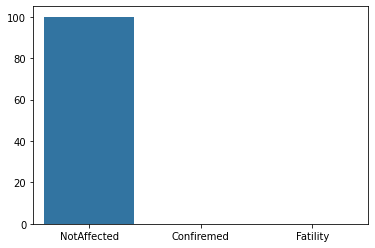

In [17]:
country_size_Affected(data,'US')

The Percentage of People NOt affected 99.9999774108851
The percentage of people with Confirmed cases 2.1406718720552038e-05
The Percentage of people with Fatility Cases 1.1823961846938356e-06


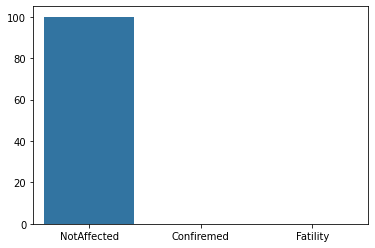

In [18]:
country_size_Affected(data,'China')

The Percentage of People NOt affected 99.60603852721563
The percentage of people with Confirmed cases 0.37471203523008
The Percentage of people with Fatility Cases 0.01924943755428367


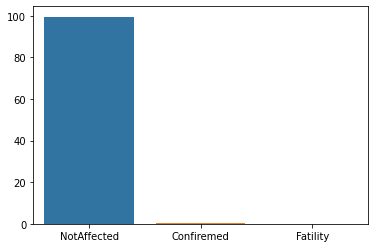

In [19]:
country_size_Affected(data,'Brazil')

<b> The above plot shows the percentage of people Not Affetected, Confirmed and Fatilities

* From the above we can see that most of the countrys Not Affected percentage is High

In [29]:
def countWithDate(data,country):
    '''Input : Data and Country Name
        outpu : It will give the plot with sorted with date of country and confirmedcases and Fatalities 
       '''
    plt.figure(figsize=(7,7))
    temp =data[(data['Country_Region'] == country) & (data['Target']=='ConfirmedCases')].sort_values(by='Date').reset_index()
    plt.plot(temp['TargetValue'],label='ConfirmedCases')
    temp =data[(data['Country_Region'] == country) & (data['Target']=='Fatalities')].sort_values(by='Date').reset_index()
    plt.plot(temp['TargetValue'],label='Fatalities')
    plt.xlabel('Date wise',fontsize=15)
    plt.ylabel('Frequency',fontsize=15)
    plt.title(' ConfirmedCases and Fatalities in {} With Date'.format(country),fontsize=15)
    plt.legend()
    plt.show()
    

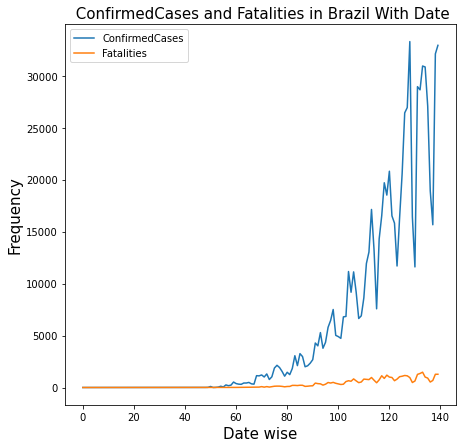

In [30]:
countWithDate(data,'Brazil')

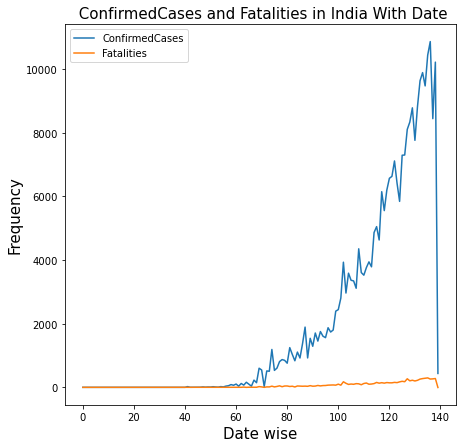

In [22]:
countWithDate(data,'India')

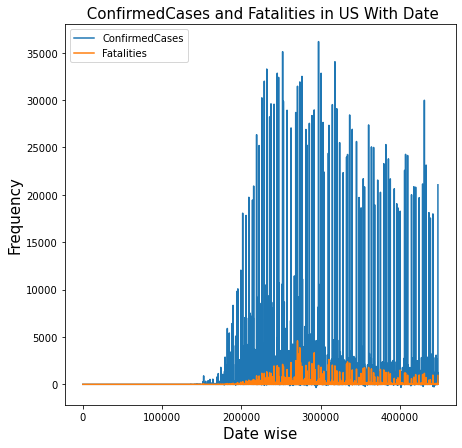

In [23]:
countWithDate(data,'US')

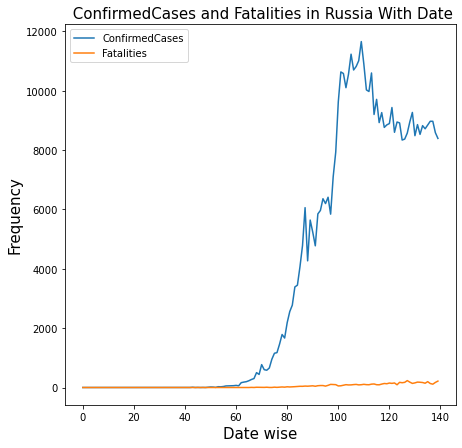

In [24]:
countWithDate(data,'Russia')

<b> By using the above function we can see the no of confirmed cases and fatilites day-by-day

* As from the above plot we can see that for these country's fatility rate is constant but Confirmed cases are increasing day by day <br>

In [205]:
fromDate = Cases.groupby(['County','Province_State','Country_Region','Date']).count().reset_index()
to_date = '2020-06-10'
from_date   = '2020-01-23'
for i in data['Country_Region'].unique():
    if (from_date ==fromDate[fromDate['Country_Region']==i]['Date'].min() and to_date ==fromDate[fromDate['Country_Region']==i]['Date'].max()):
        bool = True
    else:
        bool =False
if bool:
    print('We have the Data from each country From date {} to To date {}'.format(from_date,to_date))


We have the Data from each country From date 2020-01-23 to To date 2020-06-10


<b> We have the Data from 2020-1-23 to 2020-06-10 for Each Country

<h2> Handling Date Column

<b> Since we have only one year so we will be ignoring the Year and create a day and month column

In [3]:
##Creating  the date and month column
data['Month'] = data['Date'].apply(lambda x: x.split('-')[1])
data['Day'] = data['Date'].apply(lambda x: x.split('-')[2])

<b> Now we will merge the month column and Day because it should be in a increasing order in date like columns so frist we will do with month and next day and Convert to Int

In [4]:
data['MonthDay'] = (data['Month']+data['Day']).map(int)

In [5]:
for i in data.columns:
    print("The Percentage of  Nan Values in {} are  {} %".format(i,(data[i].isnull().sum()/len(data))/100))

The Percentage of  Nan Values in County are  0.0009240542881894312 %
The Percentage of  Nan Values in Province_State are  0.0005399942246606988 %
The Percentage of  Nan Values in Country_Region are  0.0 %
The Percentage of  Nan Values in Population are  0.0 %
The Percentage of  Nan Values in Weight are  0.0 %
The Percentage of  Nan Values in Date are  0.0 %
The Percentage of  Nan Values in Target are  0.0 %
The Percentage of  Nan Values in TargetValue are  0.0 %
The Percentage of  Nan Values in Month are  0.0 %
The Percentage of  Nan Values in Day are  0.0 %
The Percentage of  Nan Values in MonthDay are  0.0 %


<b> As we can see from above There are Nan Values in Cunty and Province State

In [6]:
data[data.Country_Region=='US']

,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue,Month,Day,MonthDay
Id,,,,,,,,,,,
67761,Autauga,Alabama,US,55869,0.091485,2020-01-23,ConfirmedCases,0,01,23,123
67762,Autauga,Alabama,US,55869,0.914848,2020-01-23,Fatalities,0,01,23,123
67763,Autauga,Alabama,US,55869,0.091485,2020-01-24,ConfirmedCases,0,01,24,124
67764,Autauga,Alabama,US,55869,0.914848,2020-01-24,Fatalities,0,01,24,124
67765,Autauga,Alabama,US,55869,0.091485,2020-01-25,ConfirmedCases,0,01,25,125
...,...,...,...,...,...,...,...,...,...,...,...
963196,NaN,NaN,US,324141489,0.510290,2020-06-08,Fatalities,500,06,08,608
963197,NaN,NaN,US,324141489,0.051029,2020-06-09,ConfirmedCases,17981,06,09,609
963198,NaN,NaN,US,324141489,0.510290,2020-06-09,Fatalities,978,06,09,609


<h2> Handling Nan Values

* Here i am making Assumption and filling the Nan Values And my Assumption is that If there are Nan values in both of the columns (County and ProvinceState). I assume that The Confirmedcases and Fatalities are for the total country not with respect to County and Province state and i will be filling these Nan  values with Country values

In [7]:
def fillNanValues(value,fillvalue):
    '''This fucntion is used to fill Nan Values in Data with Country region 
       Input : column with Nan values, Country region
       output : return value with filling nan if there is nan else it will return same value'''
    for i in range(len(value)):
        if value[i] == 'nan':
            return fillvalue[i]
        else:
            return value[i]

In [8]:
data['County'] = data['County'].map(str)
data['Province_State'] = data['Province_State'].map(str)


values = []
for i in data[['County','Country_Region']].values:
    if i[0]=='nan':
        values.append(i[1])
    else:
        values.append(i[0])
data['County'] = values

values = []
for i in data[['Province_State','Country_Region']].values:
    if i[0]=='nan':
        values.append(i[1])
    else:
        values.append(i[0])
data['Province_State'] = values

In [9]:
for i in data.columns[:-1]:
    print('The No of Unique Elements in column {} is {}'.format(i,data[i].nunique()))

The No of Unique Elements in column County is 2024
The No of Unique Elements in column Province_State is 319
The No of Unique Elements in column Country_Region is 187
The No of Unique Elements in column Population is 3408
The No of Unique Elements in column Weight is 6816
The No of Unique Elements in column Date is 140
The No of Unique Elements in column Target is 2
The No of Unique Elements in column TargetValue is 2603
The No of Unique Elements in column Month is 6
The No of Unique Elements in column Day is 31


<b> From above we can see that in column County we have 2024 and PRovince_state we have 319 unique Columns so if we do one hot encoding we will have very large no of columns

* Now we will be using the different types of Encodes and see Which one works and we will proced with that one

<b> We will do categorical Encoding in Next Step

<h2> I Will divide the problem into Two categories of Regresssion model  with Target Value Category </h2>
<ol>
    <li> Confirmed Cases </li>
    <li> Fatalities      </li>
</ol>

In [10]:
Cases = data[data['Target']=='ConfirmedCases']
Fatilites = data[data['Target']=='Fatalities']
print(Cases.shape==Fatilites.shape)

True


In [11]:
Cases.drop(['Target','Date','Month','Day'],axis=1,inplace=True)

In [12]:
Fatilites.drop(['Target','Date','Month','Day'],axis=1,inplace=True)

### Train_test Split 

In [13]:
from sklearn.model_selection import train_test_split
##Confirmed Cases
C_train,C_test,C_tr,C_te = train_test_split(Cases.drop('TargetValue',axis=1),Cases['TargetValue'],test_size=0.20,random_state=10)
## Fatilities 
F_train,F_test,F_tr,F_te = train_test_split(Fatilites.drop('TargetValue',axis=1),Fatilites['TargetValue'],test_size=0.20,random_state=0)

## Encoding Categorical Variables

In [14]:
Cat_features = ['County','Province_State','Country_Region']

<b> I have tried with Label and ordinal Encoder it doesn't perform well so I choose to encode with Generalized Linear Mixed Model Encoder

* I Choose not to  use one hot Encoder because it create a lot features 

In [15]:
#https://contrib.scikit-learn.org/category_encoders/glmm.html
encoder = ce.glmm.GLMMEncoder(cols=Cat_features)
C_train[Cat_features] = encoder.fit_transform(C_train[Cat_features],y=C_tr)
C_test[Cat_features]  = encoder.transform(C_test[Cat_features])

<h1> Confirmed Cases

<h2> KNN

<img src = 'https://static.javatpoint.com/tutorial/machine-learning/images/k-nearest-neighbor-algorithm-for-machine-learning2.png' >

<b> Here 'K' is Hyperparameter <br>

<p> Knn Works as FollowsAlgorithm :
    <ol> 
        <li>  Select How many number Neighours "k" </li>
        <li>  Caluculate the Eucliedian Distance for all the points </li>
        <li>  Select "K" Nearest Neighbors, Next if it is classification majority of k will be our predicted variable if it is a regression problem mean will be our ans </li>
        </ol>
<b> There is a concept which scikit-learn which internally used called kd-tree which is a kind of binary tree format which reduces our run time complexity </b> </br>

<b> Overfit </b> = >If K values is less it will overfit 
<b> Underfit </b> = >If K values is Maximun  it will Underfit

HyperParameter : 'K'

In [20]:

model =KNeighborsRegressor(n_jobs=-1)
params = {'n_neighbors':[3,5,7,9,15,21,33,43],
          'weights':['uniform', 'distance'],
          }
clf = GridSearchCV(model,param_grid=params,verbose=10,scoring='neg_root_mean_squared_error',return_train_score=True,n_jobs=-1)
clf.fit(C_train,C_tr)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  3.8min finished


GridSearchCV(estimator=KNeighborsRegressor(n_jobs=-1), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 15, 21, 33, 43],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=10)

In [21]:
clf.best_estimator_

KNeighborsRegressor(n_jobs=-1, n_neighbors=7, weights='distance')

In [23]:
model = KNeighborsRegressor(n_jobs=-1, n_neighbors=7, weights='distance')
model.fit(C_train,C_tr)

KNeighborsRegressor(n_jobs=-1, n_neighbors=7, weights='distance')

<h3> Mean Square  Error On Train and Test data For Confirmed Cases

In [28]:
from sklearn.metrics import mean_squared_error
print('Train score for {} is {}'.format(i,mean_squared_error(C_tr,model.predict(C_train))))
print('Test score for {} is {}'.format(i,mean_squared_error(C_te,model.predict(C_test))))

Train score for Day is 0.0
Test score for Day is 7904.5016136605755


<h3> Mean Absolute Error On Train and Test Data For Confirmed cases

In [26]:
print('Train score for {} is {}'.format(i,mean_absolute_error(C_tr,model.predict(C_train))))
print('Test score for {} is {}'.format(i,mean_absolute_error(C_te,model.predict(C_test))))

Train score for Day is 0.0
Test score for Day is 6.321639349438496


<h2> LGBM

<img src = 'https://media.geeksforgeeks.org/wp-content/uploads/20200520035248/Leaf-Wise-Tree-Growth.png' >

<h4> Algorithm </h4>
<ol>
    <li> Frist it will Train a tree with Low variance and High Bias model with very low depth </li>
    <li> Next it will caluculate psedudo_Residuals loss(negitive Gradient loss) and caluculate the loss of frist tree in frist step</li>
    <li> Then again it will fit a DT with that loss computed in next step and it will grow the tree leaf wise not depth wise unlike XGBOOSt so Leafwise will be fast to train when compared to XGBOOST </li>
    <li> It has all the COncepts of Row_sampling and Col_sampling </li>
</ol>
<b> Hyperameters => depth, num_leaves, no of learners or trees </b> </br>

<b> Overfit </b> No of trees increases </br>
<b> Underfit</b> No of tees are less </br>

In [30]:
from lightgbm import LGBMRegressor
model = LGBMRegressor(n_jobs=-1)
prams={'boosting_type':['gbdt'],
    'learning_rate':[0.05,0.1,0.15,0.2],
     'n_estimators':[50,100,150,200,300,350],
     'max_depth':[3,5,8,10],
     
}
lgbm_cfl1=GridSearchCV(model,param_grid=prams,verbose=10,scoring='neg_mean_absolute_error',return_train_score=True,n_jobs=-1)
lgbm_cfl1.fit(C_train,C_tr)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  6

GridSearchCV(estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt'],
                         'learning_rate': [0.05, 0.1, 0.15, 0.2],
                         'max_depth': [3, 5, 8, 10],
                         'n_estimators': [50, 100, 150, 200, 300, 350]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=10)

In [31]:
lgbm_cfl1.best_estimator_

LGBMRegressor(learning_rate=0.15, max_depth=10, n_estimators=350)

In [41]:
model = LGBMRegressor(learning_rate=0.15, max_depth=10, n_estimators=350)
model.fit(C_train,C_tr)

LGBMRegressor(learning_rate=0.15, max_depth=10, n_estimators=350)

In [42]:
from sklearn.metrics import mean_squared_error
print('Train score for {} is {}'.format(i,mean_squared_error(C_tr,model.predict(C_train))))
print('Test score for {} is {}'.format(i,mean_squared_error(C_te,model.predict(C_test))))

Train score for Day is 4163.855725326551
Test score for Day is 7785.123090292289


In [43]:
print('Train score for {} is {}'.format(i,mean_absolute_error(C_tr,model.predict(C_train))))
print('Test score for {} is {}'.format(i,mean_absolute_error(C_te,model.predict(C_test))))

Train score for Day is 6.994002588804768
Test score for Day is 8.366230817511905


<h2> RandomForest

<img src = 'https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/rfc_vs_dt1.png' >

<p> As From the above image i will try to explain the random Forest algorithm </br>
                                                                                   
    -> The Random Forest Has N Decision Tree's and mostly we  will grow the tree fully, Because the Random Forest Tree should have Low_variance and High Bias trees
    -> Every tree in Random Forest will have not Full Features and all the Rows we will send the rows with repitition sampling and columns with out sampling 
    -> Finally we will take the result of the Every tree If it is a classification Problem we will take the Majority vote or if it si Regression it will take mean of it
    -> Finally Random Forest = DecisionTree as base + Bagging + Row Sampling with Repetition + column sampling without repition +Majority vote or (meand Of result of every Tree)
    

In [17]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=12,n_jobs=-1)
param_grid = { 
    'n_estimators': [10,30,50,70,100,200,250,500],
    'max_depth':[2,5,7,10],
}
clf = GridSearchCV(model,param_grid=param_grid,verbose=10,scoring='neg_mean_absolute_error',n_jobs=-1)
clf.fit(C_train,C_tr)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   57.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 49.6min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 55.7min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 86.1min finished


GridSearchCV(estimator=RandomForestRegressor(n_jobs=-1, random_state=12),
             n_jobs=-1,
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 30, 50, 70, 100, 200, 250, 500]},
             scoring='neg_mean_absolute_error', verbose=10)

In [18]:
clf.best_estimator_

RandomForestRegressor(max_depth=10, n_estimators=500, n_jobs=-1,
                      random_state=12)

In [19]:
model =RandomForestRegressor(max_depth=10, n_estimators=500, n_jobs=-1,
                      random_state=12)

model.fit(C_train,C_tr)

RandomForestRegressor(max_depth=10, n_estimators=500, n_jobs=-1,
                      random_state=12)

In [20]:
print('Train score for {} is {}'.format(i,mean_squared_error(C_tr,model.predict(C_train))))
print('Test score for {} is {}'.format(i,mean_squared_error(C_te,model.predict(C_test))))

Train score for Day is 5037.522340843742
Test score for Day is 6800.162148055583


In [21]:
print('Train score for {} is {}'.format(i,mean_absolute_error(C_tr,model.predict(C_train))))
print('Test score for {} is {}'.format(i,mean_absolute_error(C_te,model.predict(C_test))))

Train score for Day is 7.767669713861699
Test score for Day is 8.486519670342679


# Fatility cases

In [22]:
#https://contrib.scikit-learn.org/category_encoders/glmm.html
encoder_fatility = ce.glmm.GLMMEncoder(cols=Cat_features)
F_train[Cat_features] = encoder.fit_transform(F_train[Cat_features],y=F_tr)
F_test[Cat_features]  = encoder.transform(F_test[Cat_features])

## Knn for Fatiliy cases

In [23]:

model =KNeighborsRegressor(n_jobs=-1)
params = {'n_neighbors':[3,5,7,9,15,21,33,43],
          'weights':['uniform', 'distance'],
          }
clf = GridSearchCV(model,param_grid=params,verbose=10,scoring='neg_root_mean_squared_error',return_train_score=True,n_jobs=-1)
clf.fit(F_train,F_tr)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  4.2min finished


GridSearchCV(estimator=KNeighborsRegressor(n_jobs=-1), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 15, 21, 33, 43],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=10)

In [25]:
clf.best_estimator_

KNeighborsRegressor(n_jobs=-1, n_neighbors=9, weights='distance')

In [26]:
model =KNeighborsRegressor(n_jobs=-1, n_neighbors=9, weights='distance')

model.fit(F_train,F_tr)

KNeighborsRegressor(n_jobs=-1, n_neighbors=9, weights='distance')

In [27]:
print('Train score for {} is {}'.format(i,mean_squared_error(F_tr,model.predict(F_train))))
print('Test score for {} is {}'.format(i,mean_squared_error(F_te,model.predict(F_test))))

Train score for Day is 0.0
Test score for Day is 127.53158828757735


In [28]:
print('Train score for {} is {}'.format(i,mean_absolute_error(F_tr,model.predict(F_train))))
print('Test score for {} is {}'.format(i,mean_absolute_error(F_te,model.predict(F_test))))

Train score for Day is 0.0
Test score for Day is 0.5383611656531602


## LGBM 

In [29]:
from lightgbm import LGBMRegressor
model = LGBMRegressor(n_jobs=-1)
prams={'boosting_type':['gbdt'],
     'n_estimators':[50,100,150,200,300,350],
     'max_depth':[3,5,8,10]     
}
lgbm_cfl1=GridSearchCV(model,param_grid=prams,verbose=10,scoring='neg_mean_absolute_error',return_train_score=True,n_jobs=-1)
lgbm_cfl1.fit(F_train,F_tr)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  5.4min finished


GridSearchCV(estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt'], 'max_depth': [3, 5, 8, 10],
                         'n_estimators': [50, 100, 150, 200, 300, 350]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=10)

In [30]:
lgbm_cfl1.best_estimator_

LGBMRegressor(max_depth=10, n_estimators=350)

In [45]:
model = LGBMRegressor(max_depth=10, n_estimators=500)
model.fit(C_train,C_tr)

LGBMRegressor(max_depth=10, n_estimators=500)

In [46]:
from sklearn.metrics import mean_squared_error
print('Train score for {} is {}'.format(i,mean_squared_error(F_tr,model.predict(F_train))))
print('Test score for {} is {}'.format(i,mean_squared_error(F_te,model.predict(F_test))))

Train score for Day is 8833.152089136634
Test score for Day is 9154.987071063486


In [47]:
print('Train score for {} is {}'.format(i,mean_absolute_error(F_tr,model.predict(F_train))))
print('Test score for {} is {}'.format(i,mean_absolute_error(F_te,model.predict(F_test))))

Train score for Day is 69.72045299281815
Test score for Day is 69.64750220908965


## Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(F_train,F_tr)

LinearRegression()

In [44]:
print('Train MeanSquaredError score for {} is {}'.format(i,mean_squared_error(F_tr,model.predict(F_train))))
print('Test MeanSquaredError score for {} is {}'.format(i,mean_squared_error(F_te,model.predict(F_test))))

Train MeanSquaredError score for Day is 484.44101332632357
Test MeanSquaredError score for Day is 696.0143861265511


In [43]:
print('Train score for {} is {}'.format(i,mean_absolute_error(F_tr,model.predict(F_train))))
print('Test score for {} is {}'.format(i,mean_absolute_error(F_te,model.predict(F_test))))

Train score for Day is 2.33489200296469
Test score for Day is 2.46365985612337


<p> Now We have done modelling for Confirmed Cases and Fatilities seperately </p>

<b> I Hereby declare that i have done aBove work without copying any other publicy available kernals 


### Thankyou